<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

<ipython-input-1-44898deed8d5>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
df = pd.read_csv('./data2017.csv')
df

,DATE,CBBTCUSD
0,2017-06-18,2515.25
1,2017-06-19,2596.98
2,2017-06-20,2725.08
3,2017-06-21,2643.35
4,2017-06-22,2679.99
...,...,...
776,2019-08-03,10820.75
777,2019-08-04,10997.82
778,2019-08-05,11775.14
779,2019-08-06,11440.08


In [5]:
df['Date'] = pd.to_datetime(df['DATE'])
df = df.set_index(['Date'], drop=True)
df.head(10)

,DATE,CBBTCUSD
Date,,
2017-06-18,2017-06-18,2515.25
2017-06-19,2017-06-19,2596.98
2017-06-20,2017-06-20,2725.08
2017-06-21,2017-06-21,2643.35
2017-06-22,2017-06-22,2679.99
2017-06-23,2017-06-23,2690.76
2017-06-24,2017-06-24,2574.84
2017-06-25,2017-06-25,2505.61
2017-06-26,2017-06-26,2407.91


# New section

<Axes: xlabel='Date'>

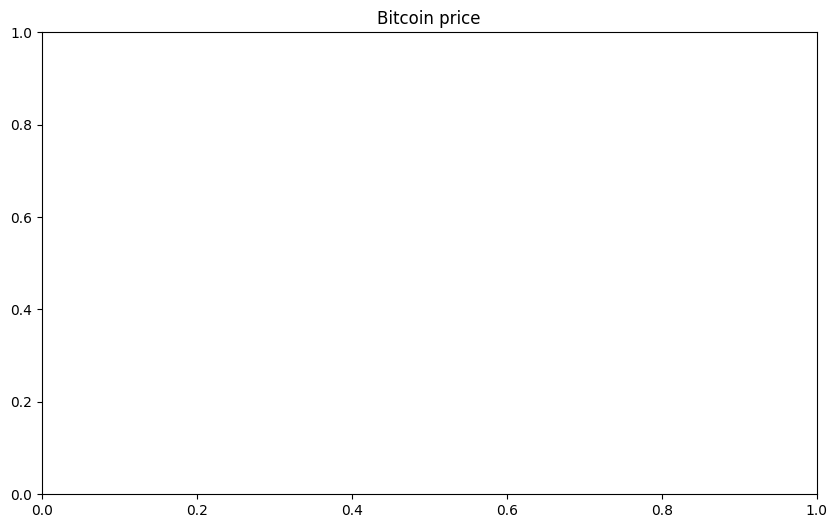

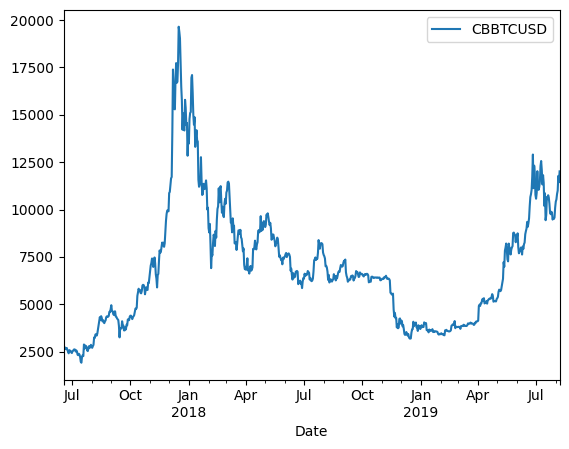

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Bitcoin price')
df.plot()

<Figure size 1000x600 with 0 Axes>

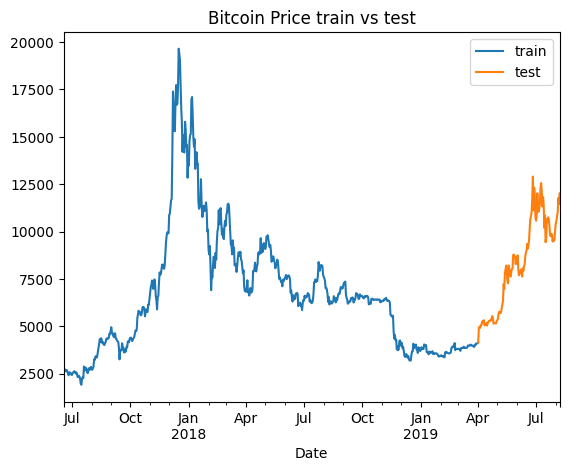

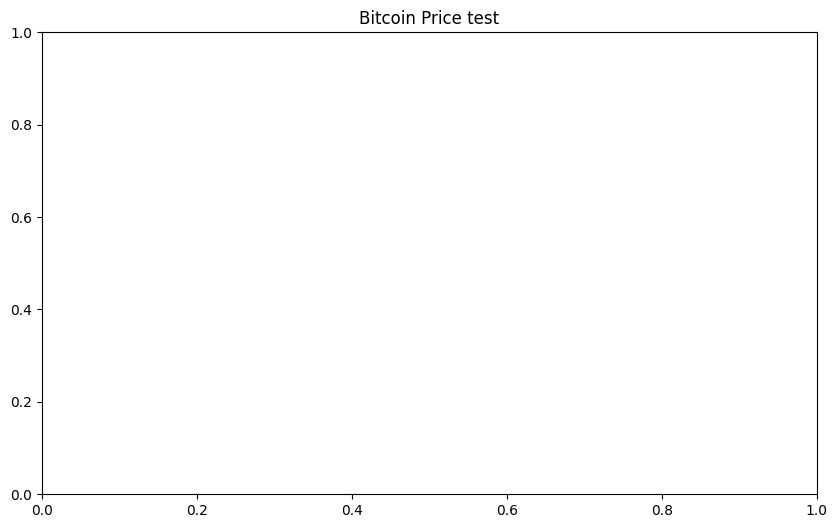

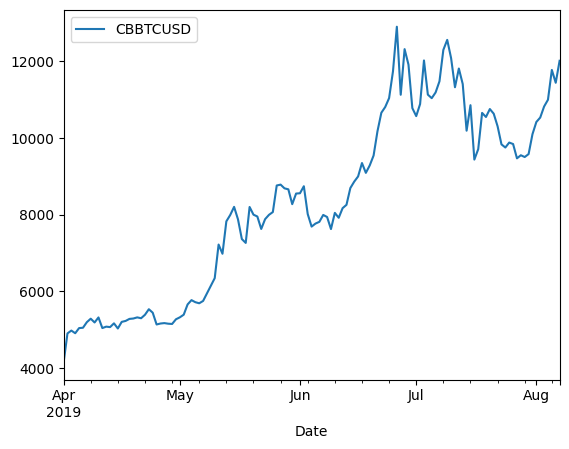

(387, 264)
(129, 264)
(129,)
(387,)


In [7]:
split_date = pd.Timestamp('2019-04-1')
# df = df['bprice']
trainf = df.loc[:split_date]
testf = df.loc[split_date:]
train2d = testf.values.reshape(-1,1)
test2d = testf.values.reshape(-1,1)
plt.figure(figsize=(10, 6))
ax = trainf.plot()
testf.plot(ax=ax)
plt.legend(['train', 'test'])
plt.title('Bitcoin Price train vs test')
plt.show()
plt.figure(figsize=(10, 6))
plt.title('Bitcoin Price test')
testf.plot();
plt.show()
prices = read_csv('./data2017.csv', header=0, index_col=0)
prices.head()
seq_length = 265
minMax = MinMaxScaler()
X = minMax.fit_transform(prices)
X = X.squeeze()
x = []
y = []
for i in range(len(prices) - seq_length):
    x.append(X[i: i+(seq_length)-1])
    y.append(X[i+(seq_length)-1])
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test= train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
x_train = x_train.reshape(-1, seq_length-1,1)
x_test = x_test.reshape(-1, seq_length-1,1)

Epoch 1/100
10/10 [==============================] - 7s 459ms/step - loss: 0.0211 - val_loss: 0.0016
Epoch 2/100
10/10 [==============================] - 4s 429ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/100
10/10 [==============================] - 5s 498ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 4/100
10/10 [==============================] - 4s 431ms/step - loss: 0.0016 - val_loss: 9.6222e-04
Epoch 5/100
10/10 [==============================] - 5s 507ms/step - loss: 0.0014 - val_loss: 9.5765e-04
Epoch 6/100
10/10 [==============================] - 5s 515ms/step - loss: 0.0013 - val_loss: 9.4964e-04
Epoch 7/100
10/10 [==============================] - 4s 422ms/step - loss: 0.0012 - val_loss: 9.3898e-04
Epoch 8/100
10/10 [==============================] - 5s 515ms/step - loss: 0.0013 - val_loss: 7.8951e-04
Epoch 9/100
10/10 [==============================] - 4s 422ms/step - loss: 0.0011 - val_loss: 6.6011e-04
Epoch 10/100
10/10 [==============================] - 5s 514ms/step

<Figure size 640x480 with 0 Axes>

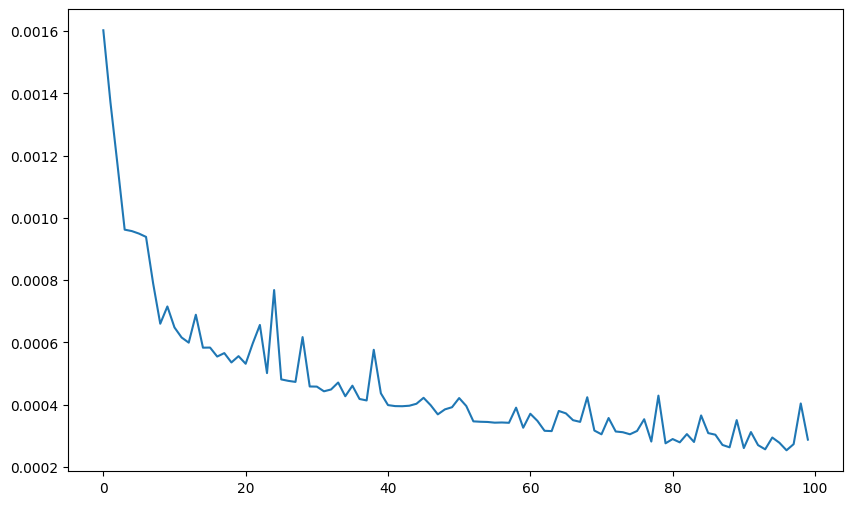

In [8]:
import keras
from keras.layers import Input, LSTM, Activation, Dense
from keras.models import Sequential, Model
from keras.callbacks import LearningRateScheduler
model = Sequential()
input = Input((seq_length-1, 1))
X = LSTM(160, recurrent_dropout= 0.5)(input)
X = Dense(1)(X)
model = Model(input, X)
model.compile(loss='mse', optimizer='adam')
def reduce(epoch, lr):
    if epoch%10 == 0:
        return lr
    return lr
scheduler = LearningRateScheduler(reduce)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)
pyplot.figure()
plt.figure(figsize=(10, 6))
plt.plot(list(history.history['val_loss']))
plt.show()

<Figure size 640x480 with 0 Axes>

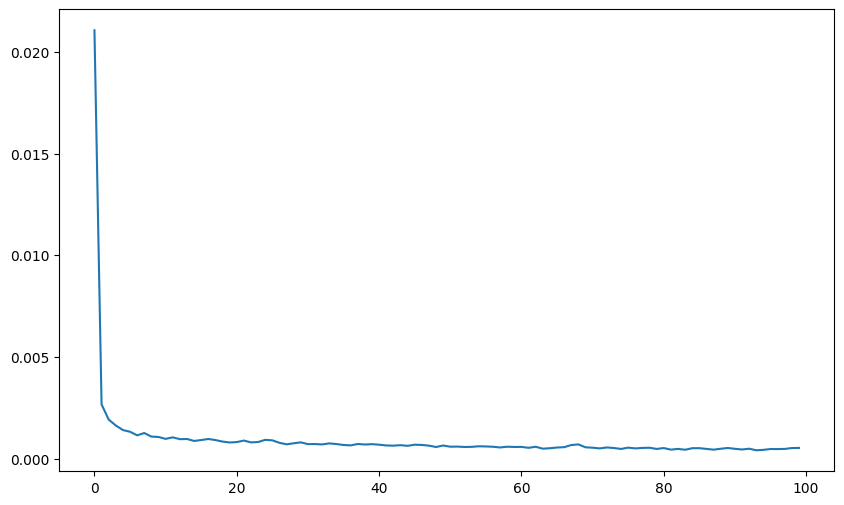

In [9]:
pyplot.figure()
plt.figure(figsize=(10, 6))
plt.plot(list(history.history['loss']))
plt.show()

5/5 [==============================] - 0s 47ms/step
MAE1 0.015406900273175908
RMSE1 0.022845721015002422
MAPE1 0.6828643038420553


<Figure size 640x480 with 0 Axes>

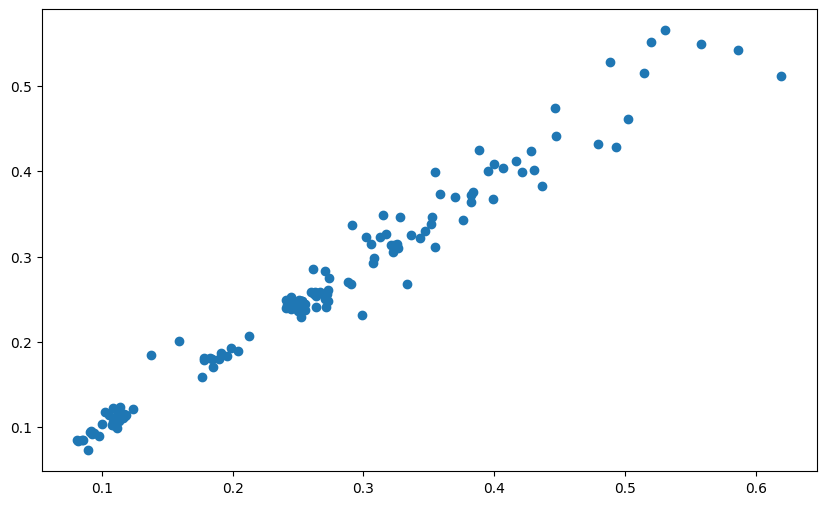

In [10]:
predictions = model.predict(x_test)
from math import sqrt
rms1 = (sqrt(mean_squared_error(y_test, predictions)))
print('MAE1', mean_absolute_error(y_test, predictions))
print('RMSE1', rms1)
mape1 = np.mean(np.abs(predictions - y_test)/np.abs(y_test))
print('MAPE1', mape1)
pyplot.figure()
plt.figure(figsize=(10, 6))
plt.scatter(y_test,predictions, marker='o')
plt.show()
pred = minMax.inverse_transform(predictions)
#y_test=y_test.reshape(-1,1)
pred = pred.squeeze()

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
y1_test=minMax.inverse_transform(y_test.reshape(-1,1))
y1_test=y1_test.squeeze()
rms = (sqrt(mean_squared_error(y1_test, pred)))
print('MAE',mean_absolute_error(y1_test, pred))
print('RMSE', rms)
mape = np.mean(np.abs(pred - y1_test)/np.abs(y1_test))
print('MAPE', mape)

MAE 273.2911122971173
RMSE 405.24262027577845
MAPE 0.038075669536519696


Corr 0.9843948216717747
mean 6696.076201550388


<Figure size 640x480 with 0 Axes>

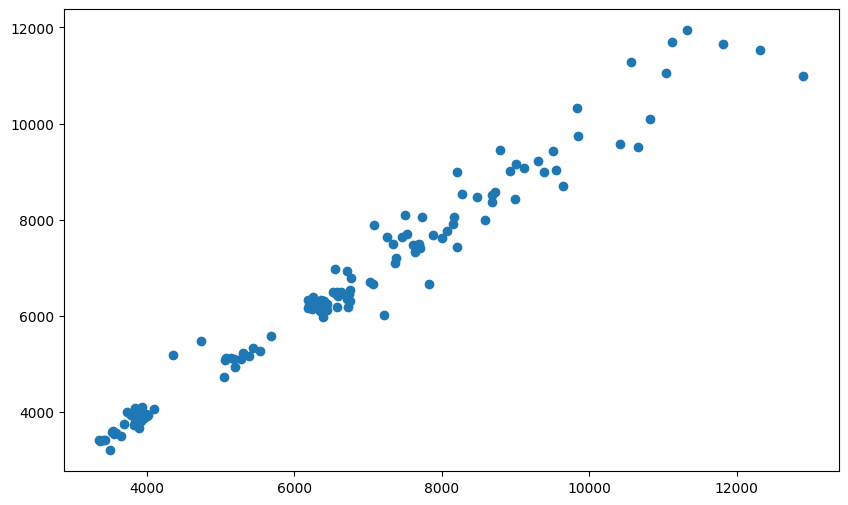

<Figure size 640x480 with 0 Axes>

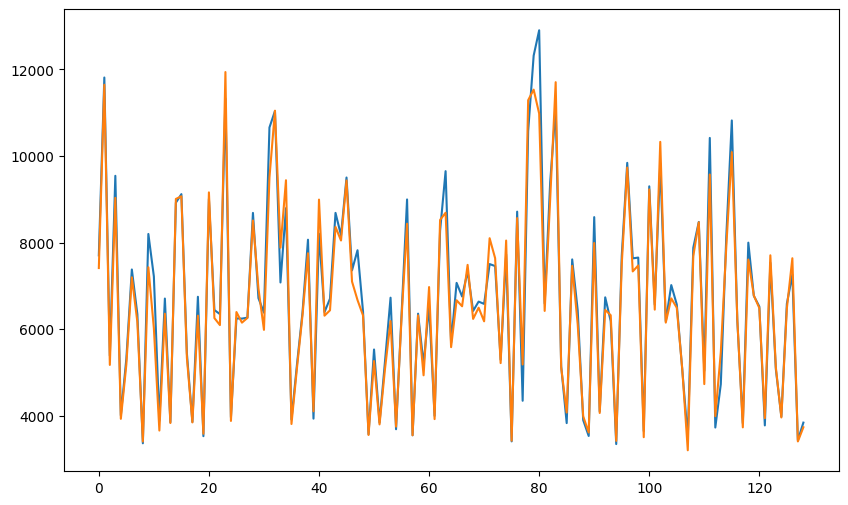

In [12]:
corr = (np.corrcoef(pred, y1_test)[0,1])
print('Corr' , corr)
#print(y1_test-pred)
mean=np.mean(y1_test)
print('mean', mean)
pyplot.figure()
plt.figure(figsize=(10, 6))
plt.scatter(y1_test,pred, marker='o')
plt.show()
pyplot.figure()
plt.figure(figsize=(10, 6))
plt.plot(y1_test)
plt.plot(pred)
plt.show()

5/5 [==============================] - 0s 50ms/step


<Figure size 640x480 with 0 Axes>

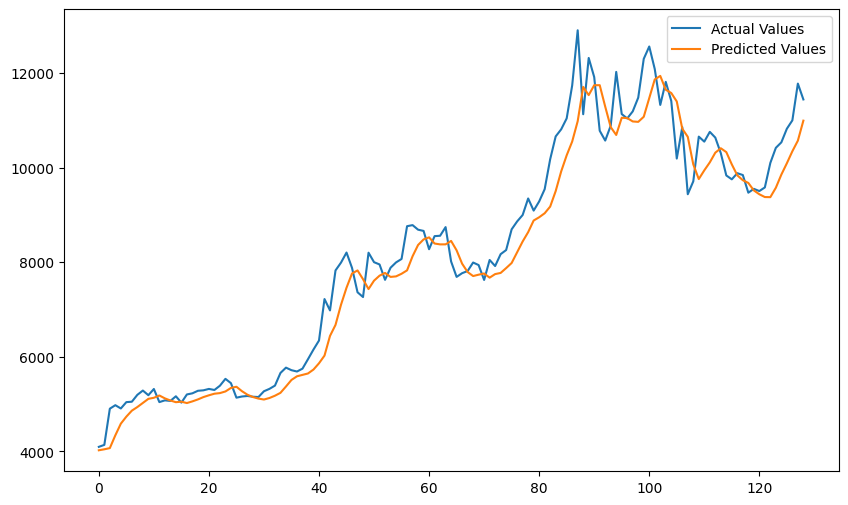

In [13]:
pyplot.figure()
plt.figure(figsize=(10, 6))
p = model.predict(x[387:516].reshape(-1, seq_length-1, 1))
p = minMax.inverse_transform(p)
p = p.squeeze()
plt.plot(minMax.inverse_transform(y[387:516].reshape(1,-1)).squeeze())
plt.plot(p)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

5/5 [==============================] - 0s 49ms/step
                       0
Date                    
2019-04-01   4022.676514
2019-04-02   4043.462891
2019-04-03   4068.872314
2019-04-04   4339.078125
2019-04-05   4585.732910
...                  ...
2019-08-03   9851.167969
2019-08-04  10090.567383
2019-08-05  10344.735352
2019-08-06  10568.801758
2019-08-07  10991.640625

[129 rows x 1 columns]


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

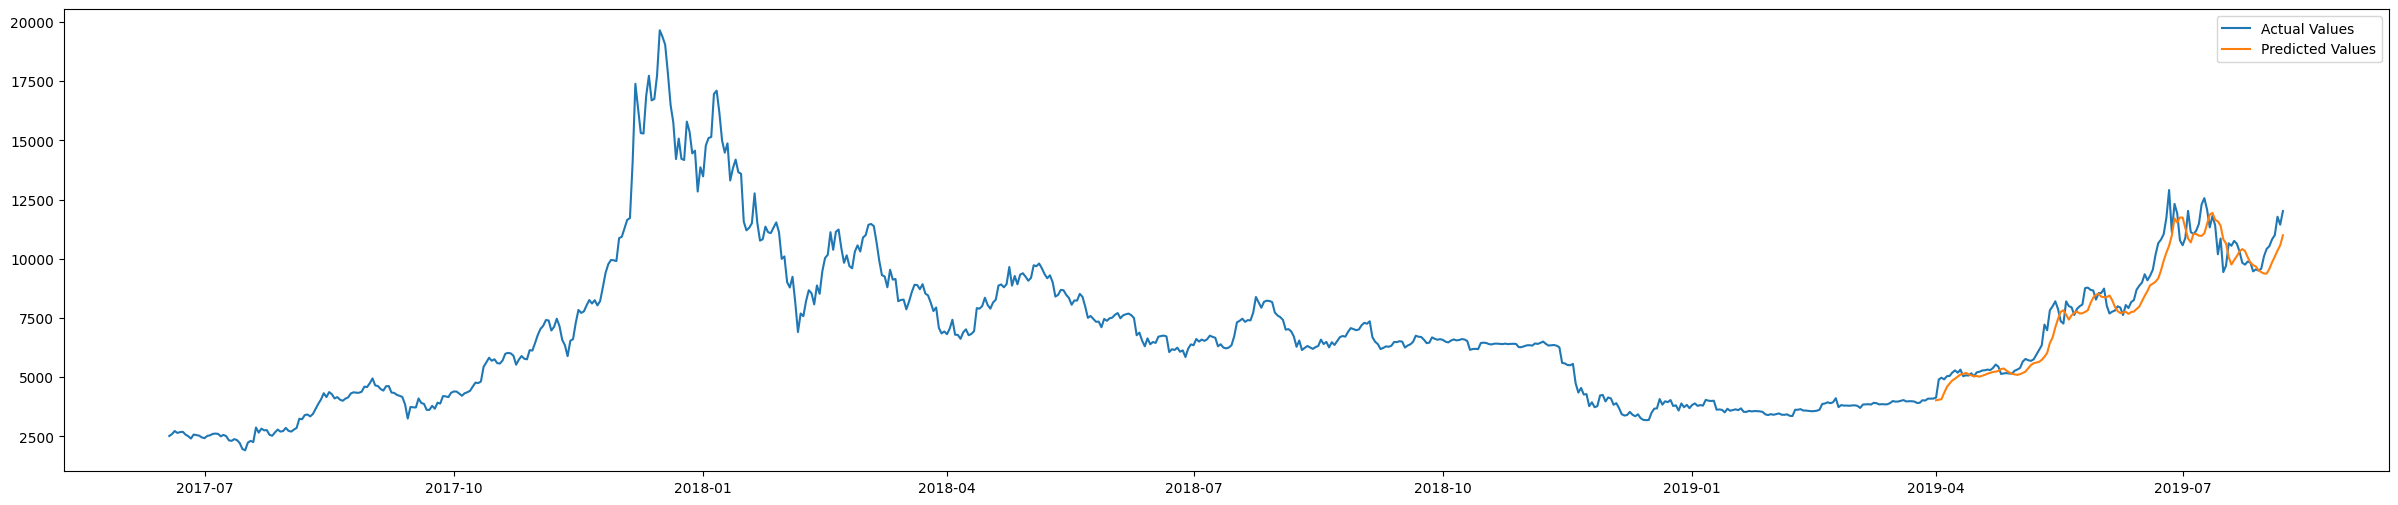

In [14]:
pyplot.figure()
plt.figure(figsize=(10, 6))
p = model.predict(x[387:516].reshape(-1, seq_length-1, 1))
p = minMax.inverse_transform(p)
p = p.squeeze()
p = pd.DataFrame(p)
p['Date'] = df.index[-1*(len(p)):]
p.set_index("Date", inplace = True)
print(p)
pyplot.figure()
plt.figure(figsize=(30, 6))
plt.plot(df['CBBTCUSD'])
plt.plot(p)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()